In [103]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [104]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [105]:
NUM_CLASSES = 30

In [106]:
NUM_CLASSES = 30

# Dataset reading

In [107]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [108]:
NUM_CLASSES = 30

In [109]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [111]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7627, 42)
y_train shape: (7627,)
X_test shape: (2543, 42)
y_test shape: (2543,)


# Model building

In [112]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )), # had to change for the two handed gestures
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [113]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_12 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 30)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,400 (5.47 KB)

 Trainable params: 1,400 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [115]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [116]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
54/60 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.0267 - loss: 3.5461 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0271 - loss: 3.5355 - val_accuracy: 0.1018 - val_loss: 3.3186
Epoch 2/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.0662 - loss: 3.3149
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0665 - loss: 3.3143 - val_accuracy: 0.1018 - val_loss: 3.1505
Epoch 3/1000
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.1123 - loss: 3.1284
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1123 - loss: 3.1267 - val_accuracy: 0.2013 - val_loss: 2.9150
Epoch 4/1000
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1406 - loss: 2.9415
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.k

In [117]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7464 - loss: 1.1198


In [118]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [119]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[5.6844964e-03 6.6698689e-05 6.3282046e-03 1.3922693e-06 5.2597828e-02
 9.8505385e-05 3.9534119e-04 3.1186726e-02 6.1011980e-03 5.9580678e-05
 8.0375731e-02 5.5512637e-02 2.4377655e-03 3.2900982e-06 4.8977945e-02
 3.8537028e-01 3.3521749e-02 1.8058835e-02 2.0685962e-03 6.0643125e-03
 4.1059400e-03 1.8572969e-02 3.6918767e-02 6.8918139e-02 2.7100081e-02
 2.9995570e-02 1.0083914e-03 4.9080268e-02 2.8108185e-02 1.2806110e-03]
15


# Confusion matrix

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step


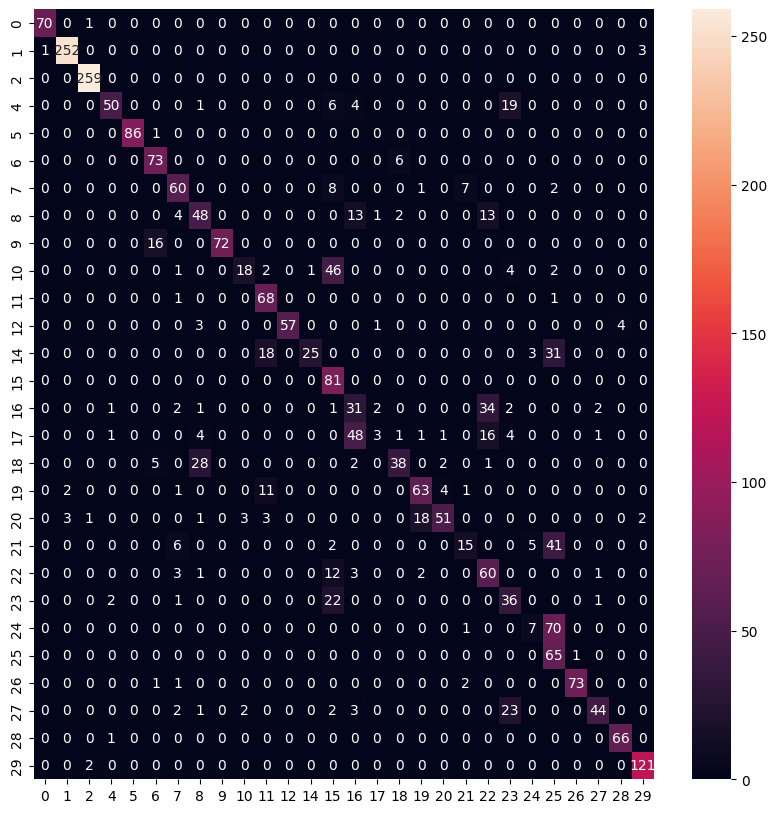

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98       256
           2       0.98      1.00      0.99       259
           4       0.91      0.62      0.74        80
           5       1.00      0.99      0.99        87
           6       0.76      0.92      0.83        79
           7       0.73      0.77      0.75        78
           8       0.55      0.59      0.57        81
           9       1.00      0.82      0.90        88
          10       0.78      0.24      0.37        74
          11       0.67      0.97      0.79        70
          12       1.00      0.88      0.93        65
          14       0.96      0.32      0.49        77
          15       0.45      1.00      0.62        81
          16       0.30      0.41      0.34        76
          17       0.43      0.04      0.07        80
          18       0.81      0.50      0.62        76
     

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [121]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )), # had to change for the two handed gestures
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Convert to model for Tensorflow-Lite

In [122]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [123]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HORIZO~1\AppData\Local\Temp\tmpi7d4if47\assets


INFO:tensorflow:Assets written to: C:\Users\HORIZO~1\AppData\Local\Temp\tmpi7d4if47\assets


Saved artifact at 'C:\Users\HORIZO~1\AppData\Local\Temp\tmpi7d4if47'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_117')
Output Type:
  TensorSpec(shape=(None, 30), dtype=tf.float32, name=None)
Captures:
  2571740245904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2571740243792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2571740239376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2571740237648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2571740237840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2571740234960: TensorSpec(shape=(), dtype=tf.resource, name=None)


7208

# Inference test

In [124]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [125]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [126]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [127]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [128]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.02917394 0.03510579 0.03307385 0.04068523 0.02828793 0.02707193
 0.02902457 0.03264466 0.03319484 0.03088191 0.03175324 0.03675294
 0.02608497 0.03329657 0.03065346 0.03571307 0.03057866 0.0314349
 0.04900453 0.02907907 0.03600505 0.03325712 0.02996614 0.03337993
 0.04366054 0.0312326  0.0352957  0.03717343 0.03357742 0.03295602]
18
